In [103]:
# from getopt import getopt
# import cloudpickle
# import pickle
# import sys
# import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.special import logit, expit
from scipy.stats import uniform, norm, bernoulli
from scipy.stats import linregress
# from statsmodels.stats.proportion import proportions_ztest
from matplotlib import pyplot as plt
import pymc as pm
import arviz as az
from modeltools import mcmc_diagnostics, create_summary_stat
from downcast import downcast_df
import jax
from pymc.sampling_jax import sample_numpyro_nuts
# from time import time, sleep
# from datetime import timedelta

## Checking pval

In [104]:
oa0_test_results = (pd.read_csv("data/simulations/oa0_test.csv")
                    .sort_values("sim_id")
                    .reset_index()
                    .drop(columns="index"))
oa1_test_results = (pd.read_csv("data/simulations/oa1_test.csv")
                    .sort_values("sim_id")
                    .reset_index()
                    .drop(columns="index"))

In [105]:
print("Checking if all values for the following columns match\n")
for c in ["p_diff", "n_raters", "scores_per_r", "total_scores", "seed"]:
    print(c, all(oa0_test_results[c]==oa1_test_results[c]))

Checking if all values for the following columns match

p_diff True
n_raters True
scores_per_r True
total_scores True
seed True


In [172]:
a=oa0_test_results
b=oa1_test_results.rename(columns={"propz_pval":"propz_pvalOA", "bht_pval":"bht_pvalOA"})
c=pd.merge(a,b[["sim_id", "propz_pvalOA", "bht_pvalOA"]],on="sim_id")
c = c[["sim_id", "trial_id", "p_diff", "n_raters", "scores_per_r", "total_scores", 
       "seed", "propz_pval", "propz_pvalOA", "bht_pval", "bht_pvalOA"]]
c["propz_OA_factor"]=c["propz_pvalOA"]/c["propz_pval"]
c["propz_OA_factor"] = c["propz_OA_factor"].round(4)
c["bht_pval"] += 1e-3
c["bht_pvalOA"] += 1e-3
c["bht_OA_factor"]=np.log(c["bht_pvalOA"]/c["bht_pval"])



In [173]:
c["bht_OA_factor"].sum()

8.306455544889584

In [120]:
var = "bht_OA_factor"
c.sort_values(var)[:20]

,sim_id,trial_id,p_diff,n_raters,scores_per_r,total_scores,seed,propz_pval,propz_pvalOA,bht_pval,bht_pvalOA,propz_OA_factor,bht_OA_factor
48,48,0,0.055,68,35,2380,90,0.118730,0.000951,0.065,0.001,0.0080,-4.174387
11,11,0,0.055,26,35,910,53,0.100175,0.008310,0.065,0.001,0.0830,-4.174387
20,20,0,0.055,87,35,3045,62,0.062418,0.000255,0.047,0.001,0.0041,-3.850148
0,0,0,0.055,80,35,2800,42,0.074110,0.032015,0.039,0.001,0.4320,-3.663562
43,43,0,0.055,29,35,1015,85,0.143778,0.012536,0.104,0.014,0.0872,-2.005334
30,30,0,0.055,60,35,2100,72,0.250283,0.054004,0.242,0.038,0.2158,-1.851352
28,28,0,0.055,145,35,5075,70,0.017670,0.000043,0.006,0.001,0.0024,-1.791759
8,8,0,0.055,31,35,1085,50,0.031790,0.062116,0.012,0.002,1.9539,-1.791759
4,4,0,0.055,134,35,4690,46,0.055007,0.098846,0.040,0.007,1.7970,-1.742969
22,22,0,0.055,77,35,2695,64,0.097774,0.076797,0.074,0.014,0.7855,-1.665008


In [122]:
c.sort_values(var)[-20:]

,sim_id,trial_id,p_diff,n_raters,scores_per_r,total_scores,seed,propz_pval,propz_pvalOA,bht_pval,bht_pvalOA,propz_OA_factor,bht_OA_factor
32,32,0,0.055,93,35,3255,74,0.013284,0.088329,0.007,0.013,6.6494,0.619039
1,1,0,0.055,36,35,1260,43,0.000433,0.006523,0.001,0.002,15.0564,0.693147
59,59,0,0.055,53,35,1855,101,0.007703,0.207983,0.002,0.004,26.9997,0.693147
29,29,0,0.055,36,35,1260,71,0.000621,0.006694,0.001,0.002,10.7838,0.693147
61,61,0,0.055,27,35,945,103,0.001367,0.000313,0.001,0.002,0.2290,0.693147
16,16,0,0.055,129,35,4515,58,0.001768,0.011139,0.002,0.005,6.3021,0.916291
34,34,0,0.055,32,35,1120,76,0.015685,0.031207,0.005,0.016,1.9897,1.163151
53,53,0,0.055,78,35,2730,95,0.000274,0.192580,0.001,0.004,701.8631,1.386294
9,9,0,0.055,72,35,2520,51,0.154422,0.796896,0.163,0.735,5.1605,1.506120
38,38,0,0.055,65,35,2275,80,0.037175,0.527371,0.031,0.220,14.1861,1.959640


## Checking scores

In [125]:
sim_id = 47
test = pd.read_csv(f"data/oa0_test/score_{sim_id}.csv")
testOA = pd.read_csv(f"data/oa1_test/score_{sim_id}.csv")

## Inference

In [126]:
# Subtracting 50 from cordel 1 topic_ids to fix phantom topic_id problem
test.loc[test["sim_cordel_id"]==1, "sim_topic_id"]-=50
testOA.loc[testOA["sim_cordel_id"]==1, "sim_topic_id"]-=50

In [127]:
n_chains = 2
seed = 41+sim_id
# seed = 21

SAMPLE_JAX = True
chain_method = "vectorized"

In [128]:
sample = test
glm_test = {"model":pm.Model()}
glm = glm_test

In [129]:
# sample = scores[scores["trial_id"]==0]
if seed != None:
    np.random.seed(seed)

# Bayesian hypothesis tests whether the two distributions in the sample are statisticaly significant
# Setting up numpy arrays for pymc
# Only 2 models and 1 corpus in simulation
corpus_array = np.array([0]*len(sample))
n_corpora = 1

model_array = np.array(sample["sim_cordel_id"])
n_models = sample["sim_cordel_id"].nunique()

cordel_array = np.array(sample["sim_cordel_id"])
n_cordels = sample["sim_cordel_id"].nunique()

topic_array = np.array([sample["sim_cordel_id"], sample["sim_topic_id"]])
n_topics = sample["sim_topic_id"].nunique()

rater_array = np.array(sample["sim_rater_id"])
n_raters = sample["sim_rater_id"].nunique()

score_array = np.array(sample["intrusion"])

# Model and MCMC specifications
empirical_mean = logit(0.75)
r_lambda = 2
t_lambda = 1
t_sigma = 1
# cm_lambda = 2
# cm_sigma = 1
mu_sigma = 1

# Rater, Topic, Cordel model

glm["model"] = pm.Model()
with glm["model"]:
    # Hyperparameter priors
    raters = pm.Data("raters", rater_array, mutable=True, dims="obs_id")
    topics = pm.Data("topics", topic_array, mutable=True, dims=["cordel", "topic"])
    cordels = pm.Data("cordels", cordel_array, mutable=True, dims="obs_id")

    sigma_r = pm.Exponential("sigma_r", lam=r_lambda)
    zr = pm.Normal("zr",mu=0, sigma=1, shape=n_raters)
    sigma_a = pm.Exponential("sigma_a", lam=t_lambda)
    za = pm.Normal("za",mu=0, sigma=t_sigma, shape=(n_cordels, n_topics)) 
    mu = pm.Normal("mu",mu=empirical_mean, sigma=mu_sigma, shape=n_cordels)

    s = pm.Bernoulli(
            "s", 
            p=pm.math.invlogit(
                mu[cordels]+
                za[topics[0],topics[1]]*sigma_a+
                zr[raters]*sigma_r),
            observed=score_array, 
            dims="obs_id")
    
    c_mean = pm.Deterministic("c_mean", 
                              pm.math.invlogit(mu + (za.T*sigma_a)).mean(axis=0), 
                              dims="obs_id")
    c_diff = pm.Deterministic("c_diff", c_mean[1]- c_mean[0])
#     c_mean = pm.Deterministic("c_mean", 
#                               pm.math.invlogit(mu + (za.T*sigma_a)).mean(axis=0), 
#                               dims="obs_id")
#     c_diff = pm.Deterministic("c_diff", c_mean.reshape([n_cordels,1]) - c_mean.reshape([1,n_cordels]), dims="obs_id")

    if SAMPLE_JAX:
        glm["trace"]=sample_numpyro_nuts(chains=n_chains, random_seed=np.random.randint(2**20), chain_method=chain_method)
    else:
        glm["trace"]=pm.sample(chains=n_chains, random_seed=np.random.randint(2**20))

# n_negatives = (glm["trace"].posterior["c_diff"].sel({"obs_id":1, "c_diff_dim_1":0}) < 0).sum().item()

#     return  n_negatives/len(sample)

Compiling...
Compilation time =  0:00:01.116727
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:41<00:00, 47.65it/s]


Sampling time =  0:00:44.097998
Transforming variables...
Transformation time =  0:00:00.068102
Computing Log Likelihood...
Log Likelihood time =  0:00:01.780100


In [130]:
# Repeate code below again for OA settings
sample = testOA
glm_testOA = {"model":pm.Model()}
glm = glm_testOA

In [131]:
# sample = scores[scores["trial_id"]==0]
if seed != None:
    np.random.seed(seed)

# Bayesian hypothesis tests whether the two distributions in the sample are statisticaly significant
# Setting up numpy arrays for pymc
# Only 2 models and 1 corpus in simulation
corpus_array = np.array([0]*len(sample))
n_corpora = 1

model_array = np.array(sample["sim_cordel_id"])
n_models = sample["sim_cordel_id"].nunique()

cordel_array = np.array(sample["sim_cordel_id"])
n_cordels = sample["sim_cordel_id"].nunique()

topic_array = np.array([sample["sim_cordel_id"], sample["sim_topic_id"]])
n_topics = sample["sim_topic_id"].nunique()

rater_array = np.array(sample["sim_rater_id"])
n_raters = sample["sim_rater_id"].nunique()

score_array = np.array(sample["intrusion"])

# Model and MCMC specifications
empirical_mean = logit(0.75)
r_lambda = 2
t_lambda = 1
t_sigma = 1
# cm_lambda = 2
# cm_sigma = 1
mu_sigma = 1

# Rater, Topic, Cordel model

glm["model"] = pm.Model()
with glm["model"]:
    # Hyperparameter priors
    raters = pm.Data("raters", rater_array, mutable=True, dims="obs_id")
    topics = pm.Data("topics", topic_array, mutable=True, dims=["cordel", "topic"])
    cordels = pm.Data("cordels", cordel_array, mutable=True, dims="obs_id")

    sigma_r = pm.Exponential("sigma_r", lam=r_lambda)
    zr = pm.Normal("zr",mu=0, sigma=1, shape=n_raters)
    sigma_a = pm.Exponential("sigma_a", lam=t_lambda)
    za = pm.Normal("za",mu=0, sigma=t_sigma, shape=(n_cordels, n_topics)) 
    mu = pm.Normal("mu",mu=empirical_mean, sigma=mu_sigma, shape=n_cordels)

    s = pm.Bernoulli(
            "s", 
            p=pm.math.invlogit(
                mu[cordels]+
                za[topics[0],topics[1]]*sigma_a+
                zr[raters]*sigma_r),
            observed=score_array, 
            dims="obs_id")
    
    c_mean = pm.Deterministic("c_mean", 
                              pm.math.invlogit(mu + (za.T*sigma_a)).mean(axis=0), 
                              dims="obs_id")
    c_diff = pm.Deterministic("c_diff", c_mean[1]- c_mean[0])
#     c_mean = pm.Deterministic("c_mean", 
#                               pm.math.invlogit(mu + (za.T*sigma_a)).mean(axis=0), 
#                               dims="obs_id")
#     c_diff = pm.Deterministic("c_diff", c_mean.reshape([n_cordels,1]) - c_mean.reshape([1,n_cordels]), dims="obs_id")

    if SAMPLE_JAX:
        glm["trace"]=sample_numpyro_nuts(chains=n_chains, random_seed=np.random.randint(2**20), chain_method=chain_method)
    else:
        glm["trace"]=pm.sample(chains=n_chains, random_seed=np.random.randint(2**20))

# n_negatives = (glm["trace"].posterior["c_diff"].sel({"obs_id":1, "c_diff_dim_1":0}) < 0).sum().item()

#     return  n_negatives/len(sample)

Compiling...
Compilation time =  0:00:01.129908
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:42<00:00, 46.71it/s]


Sampling time =  0:00:44.331091
Transforming variables...
Transformation time =  0:00:00.096954
Computing Log Likelihood...
Log Likelihood time =  0:00:02.104668


In [132]:
n_neg_test = (glm_test["trace"].posterior["c_diff"]<0).sum().item()
n_neg_testOA = (glm_testOA["trace"].posterior["c_diff"]<0).sum().item()
total = glm_test["trace"].posterior["c_diff"].count().item()
pval_test = n_neg_test/total
pval_testOA = n_neg_testOA/total
print(f"pval test: {pval_test}, pval testOA: {pval_testOA}")

pval test: 0.0, pval testOA: 0.0075


In [133]:
glm_test["summary_stat"] = create_summary_stat(glm_test["trace"])
glm_testOA["summary_stat"] = create_summary_stat(glm_testOA["trace"])

# Deleting diagnostic columns
diag_cols = ['mcse_mean', 'mcse_sd', 'ess_bulk', 'ess_tail', 'r_hat']
glm_test["summary_stat"] = glm_test["summary_stat"].drop(columns=diag_cols)
glm_testOA["summary_stat"] = glm_testOA["summary_stat"].drop(columns=diag_cols)

# Creating Summary Stats
a = glm_test["summary_stat"]
b = glm_testOA["summary_stat"].rename(columns={c:c+"OA" for c in glm_testOA["summary_stat"].columns})
c = (pd.merge(a,b, left_on=["param", "param_num"], right_on=["paramOA", "param_numOA"])
       .drop(columns=["paramOA", "param_numOA"]))

In [134]:
c[c["param"].isin(["c_mean", "c_diff"])]

,param,param_num,mean,sd,hdi_3%,hdi_97%,meanOA,sdOA,hdi_3%OA,hdi_97%OA
232,c_mean,0,0.6954,0.0117,0.6734,0.7173,0.7063,0.0117,0.6849,0.7280
233,c_mean,1,0.7416,0.0109,0.7216,0.7617,0.7360,0.0115,0.7145,0.7570
234,c_diff,NaN,0.0462,0.0117,0.0231,0.0665,0.0297,0.0118,0.0087,0.0528


In [135]:
# Plotting total variance of uniform vs OA topic effects
mu0 = c[(c["param"]=="mu")&(c["param_num"]=="0")]["mean"].item()
mu1 = c[(c["param"]=="mu")&(c["param_num"]=="1")]["mean"].item()
mu0OA = c[(c["param"]=="mu")&(c["param_num"]=="0")]["meanOA"].item()
mu1OA = c[(c["param"]=="mu")&(c["param_num"]=="1")]["meanOA"].item()

sigma_a = c[c["param"]=="sigma_a"]["mean"].item()
sigma_aOA = c[c["param"]=="sigma_a"]["meanOA"].item()

In [137]:
c

,param,param_num,mean,sd,hdi_3%,hdi_97%,meanOA,sdOA,hdi_3%OA,hdi_97%OA
0,zr,0,-1.1397,0.6000,-2.2754,-0.0400,0.4003,0.6171,-0.8068,1.5250
1,zr,1,0.6834,0.6718,-0.6127,1.8958,0.3565,0.6377,-0.7845,1.6250
2,zr,2,0.6589,0.6629,-0.5469,1.8897,-0.2261,0.6253,-1.3370,0.9328
3,zr,3,0.0967,0.6622,-1.1898,1.2928,0.0841,0.6280,-1.0574,1.2515
4,zr,4,1.2674,0.7503,-0.1123,2.6571,-0.3835,0.6530,-1.6218,0.7765
...,...,...,...,...,...,...,...,...,...,...
230,sigma_r,NaN,0.5119,0.0593,0.4041,0.6304,0.5524,0.0590,0.4460,0.6681
231,sigma_a,NaN,1.2324,0.1102,1.0304,1.4374,1.2637,0.1277,1.0426,1.5126
232,c_mean,0,0.6954,0.0117,0.6734,0.7173,0.7063,0.0117,0.6849,0.7280
233,c_mean,1,0.7416,0.0109,0.7216,0.7617,0.7360,0.0115,0.7145,0.7570


In [138]:
za = c[c["param"]=="za"]
za[["sim_cordel_id", "sim_topic_id"]] = za["param_num"].str.split(",", expand=True)
za["sim_cordel_id"] = za["sim_cordel_id"].str.strip().astype(int)
za["sim_topic_id"] = za["sim_topic_id"].str.strip().astype(int)

za.loc[za["sim_cordel_id"]==0,"topic_eff_spread"] = expit(mu0 + za["hdi_97%"]*sigma_a)-expit(mu0 + za["hdi_3%"]*sigma_a)
za.loc[za["sim_cordel_id"]==1,"topic_eff_spread"] = expit(mu1 + za["hdi_97%"]*sigma_a)-expit(mu1 + za["hdi_3%"]*sigma_a)
za.loc[za["sim_cordel_id"]==0,"topic_eff_spreadOA"] = expit(mu0OA + za["hdi_97%OA"]*sigma_a)-expit(mu0OA + za["hdi_3%OA"]*sigma_a)
za.loc[za["sim_cordel_id"]==1,"topic_eff_spreadOA"] = expit(mu1OA + za["hdi_97%OA"]*sigma_a)-expit(mu1OA + za["hdi_3%OA"]*sigma_a)

/tmp/ipykernel_5232/938748179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  za[["sim_cordel_id", "sim_topic_id"]] = za["param_num"].str.split(",", expand=True)
/tmp/ipykernel_5232/938748179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  za[["sim_cordel_id", "sim_topic_id"]] = za["param_num"].str.split(",", expand=True)
/tmp/ipykernel_5232/938748179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

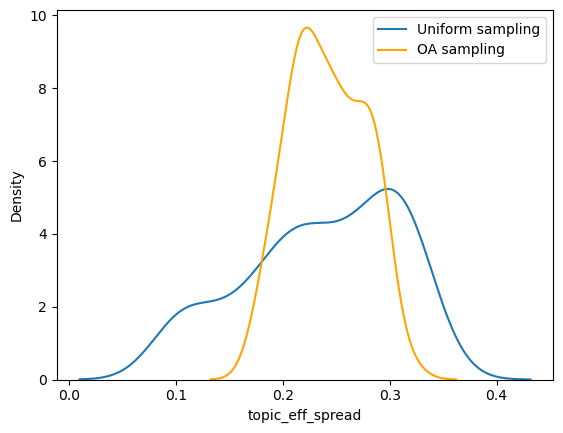

In [139]:
sns.kdeplot(za["topic_eff_spread"], label="Uniform sampling")
sns.kdeplot(za["topic_eff_spreadOA"], color="orange", label="OA sampling")
plt.legend()
plt.show()

In [140]:
# Joining posterior summary stats with scores

s = (testOA.groupby(["sim_cordel_id", "sim_topic_id"]).agg({"intrusion":"sum"})
     .rename(columns={"intrusion":"sumOA"}).reset_index())
c = (testOA.groupby(["sim_cordel_id", "sim_topic_id"]).agg({"intrusion":"count"})
     .rename(columns={"intrusion":"countOA"}).reset_index())
topicsOA = pd.merge(s, c, on=["sim_cordel_id", "sim_topic_id"])
topicsOA["pOA"] = topicsOA["sumOA"]/topicsOA["countOA"]

In [141]:
s = (test.groupby(["sim_cordel_id", "sim_topic_id"]).agg({"intrusion":"sum"})
     .rename(columns={"intrusion":"sum"}).reset_index())
c = (test.groupby(["sim_cordel_id", "sim_topic_id"]).agg({"intrusion":"count"})
     .rename(columns={"intrusion":"count"}).reset_index())
topics = pd.merge(s, c, on=["sim_cordel_id", "sim_topic_id"])
topics["p"] = topics["sum"]/topics["count"]

In [145]:
za = za.drop(columns=[c for c in a.columns if c[:3] in ("par", "hdi")])
a = pd.merge(za, topicsOA, on=["sim_cordel_id", "sim_topic_id"], how="left")
a = pd.merge(a, topics, on=["sim_cordel_id", "sim_topic_id"], how="left")

In [168]:
a["spread_improv"] = a["topic_eff_spreadOA"] - a["topic_eff_spread"]

In [169]:
# The issue is that log odds variance is greatest closest to 0 and 1!!
# To perform the comparison, we need to compare the probability, not log odds.
print("topic_eff_spread measures the difference between 3%hdi and 97%hdi of expit(topic effect)")
var = "spread_improv"
a.sort_values(var)[:10]

topic_eff_spread measures the difference between 3%hdi and 97%hdi of expit(topic effect)


,mean,sd,meanOA,sdOA,sim_cordel_id,sim_topic_id,topic_eff_spread,topic_eff_spreadOA,sumOA,countOA,pOA,sum,count,p,spread_improv
8,-0.2552,0.2860,0.2970,0.3169,0,8,0.284384,0.218093,35,44,0.795455,29,45,0.644444,-0.066291
50,-0.9045,0.2871,-0.3046,0.2788,1,0,0.314914,0.251393,38,55,0.690909,24,45,0.533333,-0.063521
25,0.0874,0.3111,1.0655,0.5616,0,25,0.256980,0.196137,19,20,0.950000,34,45,0.755556,-0.060842
70,-0.6078,0.2968,0.1773,0.3576,1,20,0.300057,0.242370,33,40,0.825000,28,44,0.636364,-0.057687
33,-0.8329,0.2875,-0.5853,0.2525,0,33,0.318747,0.266656,37,64,0.578125,23,45,0.511111,-0.052091
4,0.2154,0.3189,0.9259,0.4920,0,4,0.240907,0.191571,23,25,0.920000,35,45,0.777778,-0.049337
96,-1.3605,0.3051,-0.9701,0.2510,1,46,0.328764,0.281408,33,65,0.507692,18,45,0.400000,-0.047356
18,-0.5793,0.2804,-0.4017,0.2564,0,18,0.299840,0.254033,39,61,0.639344,25,45,0.555556,-0.045807
39,-0.2360,0.2830,-0.0241,0.2764,0,39,0.275013,0.229723,38,52,0.730769,30,45,0.666667,-0.045290
95,-0.9318,0.3015,-0.7461,0.2640,1,45,0.330381,0.285412,37,64,0.578125,24,45,0.533333,-0.044969


In [170]:
a.sort_values(var)[-10:]

,mean,sd,meanOA,sdOA,sim_cordel_id,sim_topic_id,topic_eff_spread,topic_eff_spreadOA,sumOA,countOA,pOA,sum,count,p,spread_improv
35,1.4026,0.4629,1.0068,0.5436,0,35,0.126124,0.212064,19,20,0.950,43,45,0.955556,0.085940
98,1.2017,0.4891,0.2845,0.3619,1,48,0.143621,0.232178,33,40,0.825,43,45,0.955556,0.088556
43,1.9891,0.6034,1.3620,0.6769,0,43,0.094325,0.185318,14,14,1.000,45,45,1.000000,0.090993
88,1.5407,0.5503,1.0736,0.5935,1,38,0.100784,0.197122,19,20,0.950,43,44,0.977273,0.096338
55,1.5067,0.5331,1.2385,0.6702,1,5,0.103651,0.207615,14,14,1.000,44,45,0.977778,0.103964
49,1.6701,0.5118,1.0775,0.5610,0,49,0.106129,0.213581,19,20,0.950,44,45,0.977778,0.107452
72,1.5249,0.5472,1.2526,0.6970,1,22,0.109193,0.220581,14,14,1.000,44,45,0.977778,0.111388
58,1.5012,0.5290,1.2471,0.6878,1,8,0.096482,0.209582,14,14,1.000,43,44,0.977273,0.113100
77,1.4626,0.5122,0.9032,0.5750,1,27,0.100342,0.217857,19,20,0.950,43,44,0.977273,0.117515
40,-2.5151,0.4145,-2.4970,0.5576,0,40,0.195577,0.320760,0,14,0.000,4,45,0.088889,0.125183


## Testing variance as n_raters increase

In [94]:
s = (testOA.groupby(["sim_cordel_id", "sim_topic_id"]).agg({"intrusion":"sum"})
     .rename(columns={"intrusion":"sum"}).reset_index())
c = (testOA.groupby(["sim_cordel_id", "sim_topic_id"]).agg({"intrusion":"count"})
     .rename(columns={"intrusion":"count"}).reset_index())
topics = pd.merge(s, c, on=["sim_cordel_id", "sim_topic_id"])
topics["p"] = topics["sum"]/topics["count"]

In [95]:
topics.sort_values("count")

,sim_cordel_id,sim_topic_id,sum,count,p
99,1,49,14,14,1.000000
32,0,32,14,14,1.000000
36,0,36,14,14,1.000000
41,0,41,14,14,1.000000
52,1,2,14,14,1.000000
...,...,...,...,...,...
61,1,11,32,62,0.516129
95,1,45,29,62,0.467742
1,0,1,34,62,0.548387
28,0,28,30,62,0.483871


In [123]:
topics[(topics["sim_cordel_id"]==1) & (topics["sim_topic_id"]==2)]

,sim_cordel_id,sim_topic_id,sum,count,p
52,1,2,14,14,1.0


In [28]:
summary_statsOA = pd.DataFrame()
df = testOA
seed = 42+sim_id

for n_rater in range(55, 136, 10):
# n_raters = 100
    print(n_rater)
    sample = df[df["sim_rater_id"]<n_rater]   
    
    if seed != None:
        np.random.seed(seed)

    # Bayesian hypothesis tests whether the two distributions in the sample are statisticaly significant
    # Setting up numpy arrays for pymc
    # Only 2 models and 1 corpus in simulation
    corpus_array = np.array([0]*len(sample))
    n_corpora = 1

    model_array = np.array(sample["sim_cordel_id"])
    n_models = sample["sim_cordel_id"].nunique()

    cordel_array = np.array(sample["sim_cordel_id"])
    n_cordels = sample["sim_cordel_id"].nunique()

    topic_array = np.array([sample["sim_cordel_id"], sample["sim_topic_id"]])
    n_topics = sample["sim_topic_id"].nunique()

    rater_array = np.array(sample["sim_rater_id"])
    n_raters = sample["sim_rater_id"].nunique()

    score_array = np.array(sample["intrusion"])

    # Model and MCMC specifications
    empirical_mean = logit(0.75)
    r_lambda = 2
    t_lambda = 1
    t_sigma = 1
    # cm_lambda = 2
    # cm_sigma = 1
    mu_sigma = 1

    # Rater, Topic, Cordel model

    model = pm.Model()
    with model:
        # Hyperparameter priors
        raters = pm.Data("raters", rater_array, mutable=True, dims="obs_id")
        topics = pm.Data("topics", topic_array, mutable=True, dims=["cordel", "topic"])
        cordels = pm.Data("cordels", cordel_array, mutable=True, dims="obs_id")

        sigma_r = pm.Exponential("sigma_r", lam=r_lambda)
        zr = pm.Normal("zr",mu=0, sigma=1, shape=n_raters)
        sigma_a = pm.Exponential("sigma_a", lam=t_lambda)
        za = pm.Normal("za",mu=0, sigma=t_sigma, shape=(n_cordels, n_topics)) 
        mu = pm.Normal("mu",mu=empirical_mean, sigma=mu_sigma, shape=n_cordels)

        s = pm.Bernoulli(
                "s", 
                p=pm.math.invlogit(
                    mu[cordels]+
                    za[topics[0],topics[1]]*sigma_a+
                    zr[raters]*sigma_r),
                observed=score_array, 
                dims="obs_id")

        c_mean0 = pm.Deterministic("c_mean0", mu[0] + za[0].mean()*sigma_a)
        c_mean1 = pm.Deterministic("c_mean1", mu[1] + za[1].mean()*sigma_a)
        c_diff = pm.Deterministic("c_diff", c_mean1 - c_mean0)
    #     c_mean = pm.Deterministic("c_mean", 
    #                               pm.math.invlogit(mu + (za.T*sigma_a)).mean(axis=0), 
    #                               dims="obs_id")
    #     c_diff = pm.Deterministic("c_diff", c_mean.reshape([n_cordels,1]) - c_mean.reshape([1,n_cordels]), dims="obs_id")

        if SAMPLE_JAX:
            trace=sample_numpyro_nuts(chains=n_chains, random_seed=np.random.randint(2**20), chain_method=chain_method)
        else:
            trace=pm.sample(chains=n_chains, random_seed=np.random.randint(2**20))

    n_neg = (trace.posterior["c_diff"]<0).sum().item()
    total = trace.posterior["c_diff"].count().item()
    pval = n_neg/total
    print(pval)

    summary_stat = create_summary_stat(trace)
    summary_stat.insert(0, column="n_raters", value=n_raters)
    summary_stat["pval"]=pval
    summary_statsOA = pd.concat([summary_statsOA, summary_stat], ignore_index=True)

55
Compiling...
Compilation time =  0:00:01.051810
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:25<00:00, 78.73it/s]


Sampling time =  0:00:25.687945
Transforming variables...
Transformation time =  0:00:00.065750
Computing Log Likelihood...
Log Likelihood time =  0:00:00.610427
0.0395
65
Compiling...
Compilation time =  0:00:01.012884
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:28<00:00, 70.88it/s]


Sampling time =  0:00:28.471327
Transforming variables...
Transformation time =  0:00:00.074820
Computing Log Likelihood...
Log Likelihood time =  0:00:00.636429
0.0545
75
Compiling...
Compilation time =  0:00:01.019577
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:30<00:00, 66.62it/s]


Sampling time =  0:00:30.332828
Transforming variables...
Transformation time =  0:00:00.098785
Computing Log Likelihood...
Log Likelihood time =  0:00:01.013931
0.0235
85
Compiling...
Compilation time =  0:00:01.297205
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:32<00:00, 60.87it/s]


Sampling time =  0:00:33.144694
Transforming variables...
Transformation time =  0:00:00.068514
Computing Log Likelihood...
Log Likelihood time =  0:00:00.877435
0.164
95
Compiling...
Compilation time =  0:00:01.043059
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:36<00:00, 54.31it/s]


Sampling time =  0:00:37.089005
Transforming variables...
Transformation time =  0:00:00.065963
Computing Log Likelihood...
Log Likelihood time =  0:00:01.117408
0.059
105
Compiling...
Compilation time =  0:00:01.086803
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:41<00:00, 47.81it/s]


Sampling time =  0:00:42.126125
Transforming variables...
Transformation time =  0:00:00.070530
Computing Log Likelihood...
Log Likelihood time =  0:00:01.281986
0.0355
115
Compiling...
Compilation time =  0:00:01.481448
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:40<00:00, 49.24it/s]


Sampling time =  0:00:40.911647
Transforming variables...
Transformation time =  0:00:00.071269
Computing Log Likelihood...
Log Likelihood time =  0:00:01.176159
0.075
125
Compiling...
Compilation time =  0:00:01.092332
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:47<00:00, 42.51it/s]


Sampling time =  0:00:47.374151
Transforming variables...
Transformation time =  0:00:00.091366
Computing Log Likelihood...
Log Likelihood time =  0:00:01.223234
0.076
135
Compiling...
Compilation time =  0:00:01.136767
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:45<00:00, 43.70it/s]


Sampling time =  0:00:46.088789
Transforming variables...
Transformation time =  0:00:00.066072
Computing Log Likelihood...
Log Likelihood time =  0:00:01.523388
0.041


In [71]:
summary_stats = pd.DataFrame()
df = test
seed = 42+sim_id

for n_rater in range(55, 136, 10):
# n_raters = 100
    print(n_rater)
    sample = df[df["sim_rater_id"]<n_rater]   
    
    if seed != None:
        np.random.seed(seed)

    # Bayesian hypothesis tests whether the two distributions in the sample are statisticaly significant
    # Setting up numpy arrays for pymc
    # Only 2 models and 1 corpus in simulation
    corpus_array = np.array([0]*len(sample))
    n_corpora = 1

    model_array = np.array(sample["sim_cordel_id"])
    n_models = sample["sim_cordel_id"].nunique()

    cordel_array = np.array(sample["sim_cordel_id"])
    n_cordels = sample["sim_cordel_id"].nunique()

    topic_array = np.array([sample["sim_cordel_id"], sample["sim_topic_id"]])
    n_topics = sample["sim_topic_id"].nunique()

    rater_array = np.array(sample["sim_rater_id"])
    n_raters = sample["sim_rater_id"].nunique()

    score_array = np.array(sample["intrusion"])

    # Model and MCMC specifications
    empirical_mean = logit(0.75)
    r_lambda = 2
    t_lambda = 1
    t_sigma = 1
    # cm_lambda = 2
    # cm_sigma = 1
    mu_sigma = 1

    # Rater, Topic, Cordel model

    model = pm.Model()
    with model:
        # Hyperparameter priors
        raters = pm.Data("raters", rater_array, mutable=True, dims="obs_id")
        topics = pm.Data("topics", topic_array, mutable=True, dims=["cordel", "topic"])
        cordels = pm.Data("cordels", cordel_array, mutable=True, dims="obs_id")

        sigma_r = pm.Exponential("sigma_r", lam=r_lambda)
        zr = pm.Normal("zr",mu=0, sigma=1, shape=n_raters)
        sigma_a = pm.Exponential("sigma_a", lam=t_lambda)
        za = pm.Normal("za",mu=0, sigma=t_sigma, shape=(n_cordels, n_topics)) 
        mu = pm.Normal("mu",mu=empirical_mean, sigma=mu_sigma, shape=n_cordels)

        s = pm.Bernoulli(
                "s", 
                p=pm.math.invlogit(
                    mu[cordels]+
                    za[topics[0],topics[1]]*sigma_a+
                    zr[raters]*sigma_r),
                observed=score_array, 
                dims="obs_id")

        c_mean0 = pm.Deterministic("c_mean0", mu[0] + za[0].mean()*sigma_a)
        c_mean1 = pm.Deterministic("c_mean1", mu[1] + za[1].mean()*sigma_a)
        c_diff = pm.Deterministic("c_diff", c_mean1 - c_mean0)
    #     c_mean = pm.Deterministic("c_mean", 
    #                               pm.math.invlogit(mu + (za.T*sigma_a)).mean(axis=0), 
    #                               dims="obs_id")
    #     c_diff = pm.Deterministic("c_diff", c_mean.reshape([n_cordels,1]) - c_mean.reshape([1,n_cordels]), dims="obs_id")

        if SAMPLE_JAX:
            trace=sample_numpyro_nuts(chains=n_chains, random_seed=np.random.randint(2**20), chain_method=chain_method)
        else:
            trace=pm.sample(chains=n_chains, random_seed=np.random.randint(2**20))

    n_neg = (trace.posterior["c_diff"]<0).sum().item()
    total = trace.posterior["c_diff"].count().item()
    pval = n_neg/total
    print(pval)

    summary_stat = create_summary_stat(trace)
    summary_stat.insert(0, column="n_raters", value=n_raters)
    summary_stat["pval"]=pval
    summary_stats = pd.concat([summary_stats, summary_stat], ignore_index=True)

55
Compiling...
Compilation time =  0:00:03.200976
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:22<00:00, 88.14it/s]


Sampling time =  0:00:22.948162
Transforming variables...
Transformation time =  0:00:00.064738
Computing Log Likelihood...
Log Likelihood time =  0:00:00.744071
0.1575
65
Compiling...
Compilation time =  0:00:01.271385
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:27<00:00, 73.60it/s]


Sampling time =  0:00:27.439506
Transforming variables...
Transformation time =  0:00:00.068029
Computing Log Likelihood...
Log Likelihood time =  0:00:00.598635
0.1145
75
Compiling...
Compilation time =  0:00:01.001231
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:29<00:00, 67.27it/s]


Sampling time =  0:00:29.983087
Transforming variables...
Transformation time =  0:00:00.066410
Computing Log Likelihood...
Log Likelihood time =  0:00:00.866909
0.107
85
Compiling...
Compilation time =  0:00:01.058533
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:29<00:00, 67.85it/s]


Sampling time =  0:00:29.744977
Transforming variables...
Transformation time =  0:00:00.067974
Computing Log Likelihood...
Log Likelihood time =  0:00:01.101019
0.172
95
Compiling...
Compilation time =  0:00:01.070508
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:32<00:00, 61.73it/s]


Sampling time =  0:00:32.665834
Transforming variables...
Transformation time =  0:00:00.066256
Computing Log Likelihood...
Log Likelihood time =  0:00:01.168985
0.0865
105
Compiling...
Compilation time =  0:00:01.210352
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:39<00:00, 50.63it/s]


Sampling time =  0:00:39.814352
Transforming variables...
Transformation time =  0:00:00.070539
Computing Log Likelihood...
Log Likelihood time =  0:00:01.040721
0.0715
115
Compiling...
Compilation time =  0:00:00.989649
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:40<00:00, 49.52it/s]


Sampling time =  0:00:40.645962
Transforming variables...
Transformation time =  0:00:00.070425
Computing Log Likelihood...
Log Likelihood time =  0:00:01.718161
0.055
125
Compiling...
Compilation time =  0:00:01.860461
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:48<00:00, 41.55it/s]


Sampling time =  0:00:48.534869
Transforming variables...
Transformation time =  0:00:00.066270
Computing Log Likelihood...
Log Likelihood time =  0:00:01.759097
0.009
135
Compiling...
Compilation time =  0:00:01.052314
Sampling...


sample: 100%|███████████████████████████████| 2000/2000 [00:58<00:00, 34.03it/s]


Sampling time =  0:00:59.095704
Transforming variables...
Transformation time =  0:00:00.096158
Computing Log Likelihood...
Log Likelihood time =  0:00:01.445033
0.0075


In [118]:
s=summary_statsOA
s[(s["n_raters"]==135)&(s["param"]=="za")].sort_values("sd")

,n_raters,param,param_num,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,pval
1772,135,za,"1, 11",-0.9401,0.2716,-1.4579,-0.4442,0.0116,0.0082,547.9031,1067.6673,0.9994,0.041
1806,135,za,"1, 45",-1.0796,0.2731,-1.5770,-0.5875,0.0117,0.0083,551.4162,1277.6295,1.0007,0.041
1739,135,za,"0, 28",-0.8837,0.2733,-1.3985,-0.3783,0.0121,0.0085,514.5587,981.3612,1.0044,0.041
1738,135,za,"0, 27",-0.6004,0.2736,-1.1392,-0.1057,0.0114,0.0081,569.7770,1264.5453,1.0001,0.041
1728,135,za,"0, 17",-0.7451,0.2739,-1.2502,-0.2331,0.0118,0.0084,537.5874,906.2229,1.0009,0.041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,135,za,"0, 41",1.4284,0.6711,0.2405,2.7330,0.0141,0.0111,2349.4775,1436.7692,0.9999,0.041
1720,135,za,"0, 9",1.3693,0.6711,0.2289,2.7405,0.0167,0.0136,1802.4481,1068.5419,1.0022,0.041
1741,135,za,"0, 30",1.3989,0.6772,0.1387,2.6693,0.0161,0.0124,1802.7732,1258.4709,1.0002,0.041
1810,135,za,"1, 49",1.3494,0.7039,0.0660,2.6969,0.0139,0.0118,2672.5266,1321.4180,1.0034,0.041


In [122]:
s=summary_stats
s[(s["n_raters"]==135)&(s["param"]=="za")].sort_values("sd")

,n_raters,param,param_num,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,pval
3589,135,za,"1, 10",-0.5587,0.2685,-1.0371,-0.0363,0.0126,0.0089,453.0951,1330.4486,1.0000,0.0075
3586,135,za,"1, 7",-0.7095,0.2714,-1.2000,-0.1800,0.0110,0.0078,609.0751,1102.4356,1.0011,0.0075
3562,135,za,"0, 33",-0.4941,0.2723,-0.9712,0.0422,0.0101,0.0072,720.0414,1208.2372,1.0007,0.0075
3556,135,za,"0, 27",-0.3957,0.2733,-0.9216,0.0887,0.0103,0.0073,707.5823,922.7898,1.0003,0.0075
3577,135,za,"0, 48",-0.8147,0.2733,-1.3088,-0.3071,0.0098,0.0070,767.4423,1131.7557,1.0011,0.0075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,135,za,"1, 42",1.6361,0.5156,0.6483,2.5654,0.0129,0.0099,1690.9087,1204.5883,0.9993,0.0075
3615,135,za,"1, 36",1.6491,0.5341,0.7746,2.7345,0.0142,0.0106,1497.8296,1206.1413,0.9995,0.0075
3538,135,za,"0, 9",2.0388,0.5808,1.0082,3.1436,0.0136,0.0103,1905.1905,1215.0212,0.9999,0.0075
3570,135,za,"0, 41",2.0593,0.5853,0.9108,3.1027,0.0128,0.0094,2122.7369,1430.9887,1.0021,0.0075


/tmp/ipykernel_56891/1724900651.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s0.loc[:,"topic_effect_sd"]=s0["sd"]*s0["sigma_a"]


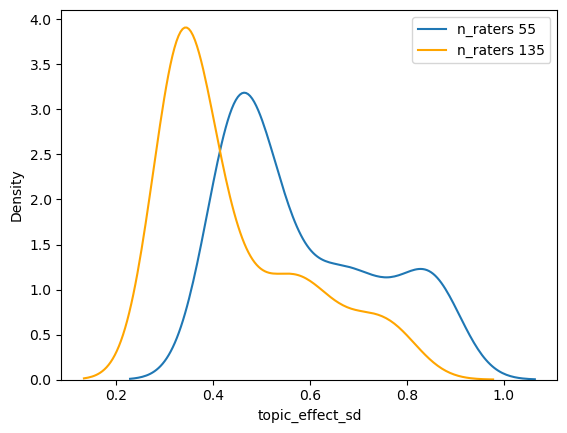

In [115]:
s=summary_statsOA
sigma_a = s[s["param"]=="sigma_a"]
sigma_a=sigma_a.rename(columns={"mean":"sigma_a"})[["n_raters", "sigma_a"]]
s = pd.merge(s, sigma_a, on="n_raters", how="left")
s0=s[(s["param"]=="za")]
s0.loc[:,"topic_effect_sd"]=s0["sd"]*s0["sigma_a"]

sns.kdeplot(s0[s0["n_raters"]==55]["topic_effect_sd"], label="n_raters 55")
sns.kdeplot(s0[s0["n_raters"]==135]["topic_effect_sd"], c="orange", label="n_raters 135")
plt.legend()
plt.show()

/tmp/ipykernel_56891/1454429574.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s0.loc[:,"topic_effect_sd"]=s0["sd"]*s0["sigma_a"]


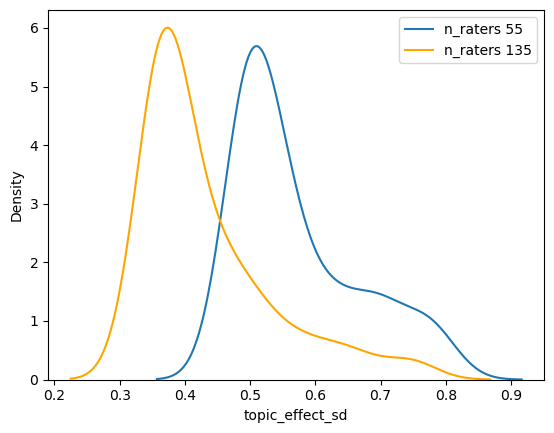

In [116]:
s=summary_stats
sigma_a = s[s["param"]=="sigma_a"]
sigma_a=sigma_a.rename(columns={"mean":"sigma_a"})[["n_raters", "sigma_a"]]
s = pd.merge(s, sigma_a, on="n_raters", how="left")
s0=s[(s["param"]=="za")]
s0.loc[:,"topic_effect_sd"]=s0["sd"]*s0["sigma_a"]

sns.kdeplot(s0[s0["n_raters"]==55]["topic_effect_sd"], label="n_raters 55")
sns.kdeplot(s0[s0["n_raters"]==135]["topic_effect_sd"], c="orange", label="n_raters 135")
plt.legend()
plt.show()

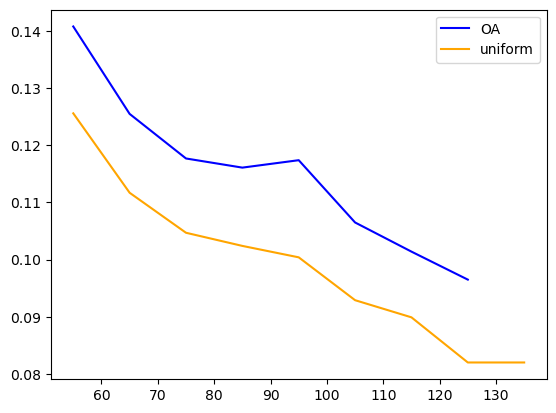

In [108]:
s = summary_statsOA
# param = "mu"
# param_num = "0"
param = "c_diff"
param_num = None
stat = "sd"

if param_num==None:
    s0 = s[(s["param"]==param)]
else:
    s0 = s[(s["param"]==param)&(s["param_num"]==param_num)]

plt.plot(s0["n_raters"], s0[stat], c="blue", label="OA")


s = summary_stats

if param_num==None:
    s0 = s[(s["param"]==param)]
else:
    s0 = s[(s["param"]==param)&(s["param_num"]==param_num)]

plt.plot(s0["n_raters"], s0[stat], c="orange", label="uniform")
plt.legend()
plt.show()